# Deep Dive Assignment with python only (For learning Purposes)
## W2W3 JAN23
### Muhammad Ihsan

=========================================================================

# 1. Goals
Memaksimalkan profit dengan melakukan pengolahan data untuk mendapatkan insight yang berguna tentang property listing di Kuala Lumpur, Malaysia.



## a. Objectives
    Melakukan analisis end-to-end (pembersihan, EDA, dan regresi) pada dataset yang diberikan.



## b. Bagaimana data bisa memberikan jawaban dari goals yang di tetapkan?

 <b> kita bisa mendapatkan Insight dari:

1. Harga rata-rata: 
    melihat harga rata-rata properti di berbagai lokasi, jenis properti, dan rentang harga untuk memahami tren harga dan peningkatan/penurunan harga.

2. Ukuran lahan vs Harga:
    membandingkan ukuran lahan dan build-up antar properti untuk melihat bagaimana ukuran properti mempengaruhi harga.

3. Lokasi vs Harga: 
    menganalisa bagaimana lokasi mempengaruhi harga, termasuk jarak dari fasilitas umum, aksesibilitas, dan tingkat kriminalitas.

4. Jenis properti vs Harga:
    menilai bagaimana jenis properti seperti rumah, apartemen, dan kondominium mempengaruhi harga.

5. Fasilitas vs Harga: 
    melihat bagaimana fasilitas seperti pemandangan, taman, kolam renang, dan lainnya mempengaruhi harga.

6. Rentang harga: 
    mengamati rentang harga dan harga tertinggi dan terendah dalam rentang harga untuk melihat bagaimana harga berubah di berbagai tingkat harga.

7. Tren harga: 
    mengamati tren harga untuk melihat bagaimana harga berubah dalam jangka waktu tertentu dan memprediksi perubahan harga di masa depan.




<b>Statistic yang dapat menjawab:

    a. Descryptive Statistic
    b. Correlation Analysis
    c. Linier Regression Analysis

    yang berisikan tentang:
    
    - Mean / Median: Menghitung rata-rata harga properti untuk melihat tren harga rata-rata.

    - Modus: Menemukan harga properti yang paling sering muncul untuk melihat harga populer dalam data.

    - Standar Deviasi: Menghitung variasi harga properti untuk melihat seberapa banyak harga properti berbeda dari harga rata-rata.

    - Range: Menentukan jarak antara harga terendah dan tertinggi dalam data properti untuk melihat rentang harga yang ada.

    - Correlation: Menganalisa hubungan antara ukuran lahan, build-up, dan lokasi dengan harga properti untuk melihat bagaimana faktor-faktor tersebut mempengaruhi harga.

    - Regression Analysis: Menganalisa bagaimana harga properti berubah berdasarkan faktor-faktor seperti ukuran lahan, build-up, dan lokasi untuk memprediksi perubahan harga di masa depan.

    - Box Plot: Menampilkan distribusi data harga properti, termasuk tren harga, rentang harga, dan outlier.

    - Histogram: Menunjukkan frekuensi harga properti dalam rentang harga tertentu untuk melihat bagaimana harga tersebar.
    - Heatmap

# 2. Data Cleaning
    Data Quality Check
    
<b>a. Formatting 
- Apakah ada variable yang data type dan format nya tidak sesuai?

<b>b. Outliers
- missing values atau outliers, bagaimana mengatasi hal-hal tersebut?

<b>c. Distributions
- Apakah terdapat distribusi yang tidak masuk akal?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\desktop download\JUPYTER_NB\intermediate new\dataset.csv")
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,Built-up :,"1,335 sqft",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area,6900 sqft,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),Built-up :,"1,875 sqft",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",5,3.0,4.0,Condominium (Corner),Built-up :,"1,513 sqft",Partly Furnished


In [3]:
# mengetahui jumlah row dan column
df.shape

(5000, 9)

## a. Formatting 
- Apakah ada variable yang data type dan format nya tidak sesuai?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            5000 non-null   object 
 1   Price               4964 non-null   object 
 2   Rooms               4865 non-null   object 
 3   Bathrooms           4842 non-null   float64
 4   Car Parks           3528 non-null   float64
 5   Property Type       4975 non-null   object 
 6   Property Character  4890 non-null   object 
 7   Size                4890 non-null   object 
 8   Furnishing          4414 non-null   object 
dtypes: float64(2), object(7)
memory usage: 351.7+ KB


Data type yang tidak sesuai adalah:
- Price = Int
- Rooms = Int
- Bathrooms = Int
- Car Parks = Int
- Size = Int


In [5]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
        
    print()

Location object
['KLCC, Kuala Lumpur' 'Damansara Heights, Kuala Lumpur'
 'Dutamas, Kuala Lumpur' 'Cheras, Kuala Lumpur'
 'Bukit Jalil, Kuala Lumpur' 'Taman Tun Dr Ismail, Kuala Lumpur'
 'Seputeh, Kuala Lumpur' 'Sri Petaling, Kuala Lumpur'
 'Ampang Hilir, Kuala Lumpur' 'Bukit Tunku (Kenny Hills), Kuala Lumpur'
 'Mont Kiara, Kuala Lumpur' 'Desa ParkCity, Kuala Lumpur'
 'Bangsar South, Kuala Lumpur' 'Sungai Besi, Kuala Lumpur'
 'Jalan Klang Lama (Old Klang Road), Kuala Lumpur' 'Kepong, Kuala Lumpur'
 'Jalan Kuching, Kuala Lumpur' 'KL City, Kuala Lumpur'
 'Taman Melawati, Kuala Lumpur' 'Sentul, Kuala Lumpur'
 'KL Sentral, Kuala Lumpur' 'Setapak, Kuala Lumpur'
 'Bangsar, Kuala Lumpur' 'City Centre, Kuala Lumpur'
 'Bukit Bintang, Kuala Lumpur' 'Jalan Sultan Ismail, Kuala Lumpur'
 'Kuchai Lama, Kuala Lumpur' 'Country Heights Damansara, Kuala Lumpur'
 'Taman Desa, Kuala Lumpur' 'Segambut, Kuala Lumpur'
 'Batu Caves, Kuala Lumpur' 'Wangsa Maju, Kuala Lumpur'
 'Ampang, Kuala Lumpur' 'Sri Hartama

In [6]:
df.duplicated().sum()

68

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

### - Location
Duplicates 'location' >>> Kuala Lumpur

Before:

In [9]:
df.Location

0                    KLCC, Kuala Lumpur
1       Damansara Heights, Kuala Lumpur
2                 Dutamas, Kuala Lumpur
3                  Cheras, Kuala Lumpur
4             Bukit Jalil, Kuala Lumpur
                     ...               
4994               Ampang, Kuala Lumpur
4995               Sentul, Kuala Lumpur
4996               Ampang, Kuala Lumpur
4997               Cheras, Kuala Lumpur
4999               Cheras, Kuala Lumpur
Name: Location, Length: 4932, dtype: object

After:

In [10]:
df['Location'] = df['Location'].str.replace(', Kuala Lumpur', '')

df.Location

0                    KLCC
1       Damansara Heights
2                 Dutamas
3                  Cheras
4             Bukit Jalil
              ...        
4994               Ampang
4995               Sentul
4996               Ampang
4997               Cheras
4999               Cheras
Name: Location, Length: 4932, dtype: object

In [11]:
df.Location.duplicated().sum()

4867

### - Price

Before:

In [12]:
df.Price

0       RM 1,250,000
1       RM 6,800,000
2       RM 1,030,000
3                NaN
4         RM 900,000
            ...     
4994    RM 2,200,000
4995      RM 414,600
4996    RM 1,350,000
4997      RM 483,300
4999      RM 439,600
Name: Price, Length: 4932, dtype: object

After:

In [13]:
df['Price'] = df['Price'].str.replace('RM ', '')
df['Price'] = df['Price'].str.replace(',', '')

df.Price

0       1250000
1       6800000
2       1030000
3           NaN
4        900000
         ...   
4994    2200000
4995     414600
4996    1350000
4997     483300
4999     439600
Name: Price, Length: 4932, dtype: object

=============================================================




Drop NaN (Missing Value)

Karena Price adalah variable terpenting, jadi di dahulukan

In [14]:
df.dropna(subset=['Price'], inplace=True)

df.Price

0       1250000
1       6800000
2       1030000
4        900000
5       5350000
         ...   
4994    2200000
4995     414600
4996    1350000
4997     483300
4999     439600
Name: Price, Length: 4898, dtype: object

<b>Convert Dtype to Int

In [15]:
df['Price'] = df['Price'].astype(int)
df.Price

0       1250000
1       6800000
2       1030000
4        900000
5       5350000
         ...   
4994    2200000
4995     414600
4996    1350000
4997     483300
4999     439600
Name: Price, Length: 4898, dtype: int32

<b>.
    
    
    
    Scanning Missing Value

In [16]:
df.isna().sum().sort_values(ascending=False)

Car Parks             1446
Furnishing             553
Bathrooms              132
Rooms                  109
Property Character      83
Size                    83
Location                 0
Price                    0
Property Type            0
dtype: int64

In [17]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
0,KLCC,1250000,2+1,3.0,2.0,Serviced Residence,Built-up :,"1,335 sqft",Fully Furnished
1,Damansara Heights,6800000,6,7.0,NaN,Bungalow,Land area,6900 sqft,Partly Furnished
2,Dutamas,1030000,3,4.0,2.0,Condominium (Corner),Built-up :,"1,875 sqft",Partly Furnished
4,Bukit Jalil,900000,5,3.0,4.0,Condominium (Corner),Built-up :,"1,513 sqft",Partly Furnished
5,Taman Tun Dr Ismail,5350000,6,5.0,4.0,Bungalow,Land area,7200 sqft,Partly Furnished


-

_______________________________________________________________________________________________________________________________________________________
### - Car Parks

In [18]:
print(*sorted(df['Car Parks'].unique(), reverse=True), sep='\n')

nan
28.0
15.0
13.0
12.0
10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0


-

_______________________________________________________________________________________________________________________________________________________
<b>Convert NaN to 0 & Float to Int

In [19]:
df['Car Parks'].fillna(0, inplace=True)

df['Car Parks'] = df['Car Parks'].astype(int)

print(*sorted(df['Car Parks'].unique(), reverse=True), sep='\n')


28
15
13
12
10
9
8
7
6
5
4
3
2
1
0


-

_______________________________________________________________________________________________________________________________________________________
### - Furnishing

- ganti dtype object ke string lalu ke object lagi untuk dapat mengetahui jumlah NaN

In [20]:
df['Furnishing'] = df['Furnishing'].astype(str).astype(object)
print(*sorted(df['Furnishing'].unique()), sep='\n')

df['Furnishing'].value_counts()

Fully Furnished
Partly Furnished
Unfurnished
Unknown
nan


Partly Furnished    2609
Fully Furnished     1241
nan                  553
Unfurnished          451
Unknown               44
Name: Furnishing, dtype: int64

<b>karena jumlahnya cukup banyak, Kita Asumsikan NaN dan Unknown adalah Unfurnished. Maka:

In [21]:
df['Furnishing'] = df['Furnishing'].str.replace('nan', 'Unfurnished')
df['Furnishing'] = df['Furnishing'].str.replace('Unknown', 'Unfurnished')

df['Furnishing'].value_counts()

Partly Furnished    2609
Fully Furnished     1241
Unfurnished         1048
Name: Furnishing, dtype: int64

-

_______________________________________________________________________________________________________________________________________________________
### - Bathrooms

In [22]:
df.Bathrooms

0       3.0
1       7.0
2       4.0
4       3.0
5       5.0
       ... 
4994    6.0
4995    2.0
4996    4.0
4997    2.0
4999    2.0
Name: Bathrooms, Length: 4898, dtype: float64

-

_______________________________________________________________________________________________________________________________________________________
<b>Hapus titik dan nol

In [23]:
df['Bathrooms'] = df['Bathrooms'].astype(str).astype(object)

df['Bathrooms'] = df['Bathrooms'].str.replace('.0', '')

In [24]:
df['Bathrooms'].value_counts()

2      1594
3       835
4       786
5       608
6       385
1       369
nan     132
7       116
8        35
9        26
          7
11        2
16        1
12        1
13        1
Name: Bathrooms, dtype: int64

In [25]:
# karena lumayan banyak nan dan blank value, maka di asumsikan sebagai 0 / tanpa kamar mandi

df['Bathrooms'] = df['Bathrooms'].str.replace('nan', '0')

df['Bathrooms'].value_counts()

2     1594
3      835
4      786
5      608
6      385
1      369
0      132
7      116
8       35
9       26
         7
11       2
16       1
12       1
13       1
Name: Bathrooms, dtype: int64

In [26]:
df['Bathrooms'].fillna(0, inplace=True)

df['Bathrooms'].value_counts()

2     1594
3      835
4      786
5      608
6      385
1      369
0      132
7      116
8       35
9       26
         7
11       2
16       1
12       1
13       1
Name: Bathrooms, dtype: int64

In [27]:
df['Bathrooms'].replace('', 0, inplace=True)
df['Bathrooms'] = df['Bathrooms'].astype(int)


df['Bathrooms'].value_counts()

2     1594
3      835
4      786
5      608
6      385
1      369
0      139
7      116
8       35
9       26
11       2
16       1
12       1
13       1
Name: Bathrooms, dtype: int64

In [28]:
df['Bathrooms'] = df['Bathrooms'].astype(int)

-

_______________________________________________________________________________________________________________________________________________________
### - Rooms

In [29]:
df['Rooms'].value_counts()

4         1284
3         1165
5          826
2          593
6          410
1          235
7          159
Studio      52
8           44
9           10
10           3
2+1          2
12           1
5+1          1
14           1
13           1
20           1
3+1          1
Name: Rooms, dtype: int64

In [30]:
df['Rooms'].value_counts()

4         1284
3         1165
5          826
2          593
6          410
1          235
7          159
Studio      52
8           44
9           10
10           3
2+1          2
12           1
5+1          1
14           1
13           1
20           1
3+1          1
Name: Rooms, dtype: int64

In [31]:
# ganti semua yang tidak konsisten datanya (tipe studio saya namakan dengan 0

df['Rooms'] = df['Rooms'].replace({'Studio': 0, '2+1': 3, '3+1': 4, '5+1': 6})
df['Rooms'] = df['Rooms'].astype(str)
df['Rooms'].value_counts()

4      1285
3      1167
5       826
2       593
6       411
1       235
7       159
nan     109
0        52
8        44
9        10
10        3
14        1
12        1
13        1
20        1
Name: Rooms, dtype: int64

In [32]:
df['Rooms'].replace('nan', 0, inplace=True)
df['Rooms'] = df['Rooms'].astype(int)

df['Rooms'].value_counts()

4     1285
3     1167
5      826
2      593
6      411
1      235
0      161
7      159
8       44
9       10
10       3
14       1
12       1
13       1
20       1
Name: Rooms, dtype: int64

-

_______________________________________________________________________________________________________________________________________________________
### - Property Character

In [33]:
df['Property Character'] = df['Property Character'].astype(str)
df['Property Character'].value_counts()

Built-up :    3485
Land area     1329
nan             83
sq. m.           1
Name: Property Character, dtype: int64

In [34]:
df.loc[df['Property Character'] == 'sq. m.']

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
2730,Cheras,1350000,3,2,2,Serviced Residence (Intermediate),sq. m.,"1,405 sq.m.",Partly Furnished


In [35]:
# karna tipe properti nya adalah service residence maka saya asumsikan sebagai Build Up type. maka:

df['Property Character'].replace('sq. m.', 'Built-up', inplace=True)

df['Property Character'].value_counts()

Built-up :    3485
Land area     1329
nan             83
Built-up         1
Name: Property Character, dtype: int64

In [36]:
# ubah Built-up : menjadi Build-up dan nan menjadi 'unknown'

df['Property Character'].replace('Built-up :', 'Built-up', inplace=True)
df['Property Character'].replace('nan', 'Unknown', inplace=True)
df['Property Character'].value_counts()

Built-up     3486
Land area    1329
Unknown        83
Name: Property Character, dtype: int64

In [37]:
df['Property Character'] = df['Property Character'].astype(str)
df['Property Character'].value_counts()

Built-up     3486
Land area    1329
Unknown        83
Name: Property Character, dtype: int64

-

_______________________________________________________________________________________________________________________________________________________
### - Size

In [38]:
df['Size'].value_counts()

1650 sqft        80
1760 sqft        65
1,200 sqft       35
1,100 sqft       31
1,830 sqft       30
                 ..
4,069 sqft        1
4277 sqft         1
1615 sqft         1
1,288 sqft        1
893-1195 sqft     1
Name: Size, Length: 1607, dtype: int64

In [39]:
# clean sqft dan ,
df['Size'] = df['Size'].astype(str)

df['Size'] = df['Size'].str.replace(',', '')
df['Size'] = df['Size'].str.replace(' sqft', '')
df['Size'] = df['Size'].str.replace('nan', '0')
df['Size'] = df['Size'].replace('','0')

df['Size'] = df['Size'].astype(str)

df['Size'].value_counts()

0              93
1650           82
1760           65
1400           50
1200           44
               ..
3070            1
1273            1
9838            1
22&#215;100     1
893-1195        1
Name: Size, Length: 1451, dtype: int64

In [40]:
#membersihkan yang bukan angka

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
errors = df[df['Size'].isna()]

df['Size'].value_counts()

0.0       93
1650.0    82
1760.0    65
1400.0    50
1200.0    44
          ..
3055.0     1
2272.0     1
2659.0     1
6390.0     1
5403.0     1
Name: Size, Length: 1426, dtype: int64

In [41]:
df['Size'].isnull().sum()

29

In [42]:
df['Size'] = df['Size'].astype(str)
df['Size'] = df['Size'].str.replace('nan', '0')

In [43]:
(df['Size'].astype(str) == 'nan').sum()

0

In [44]:
df['Size'] = df['Size'].astype(float).astype(int)

df['Size'].value_counts()

0       122
1650     82
1760     65
1400     50
1200     44
       ... 
3055      1
2272      1
2659      1
6390      1
5403      1
Name: Size, Length: 1426, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location            4898 non-null   object
 1   Price               4898 non-null   int32 
 2   Rooms               4898 non-null   int32 
 3   Bathrooms           4898 non-null   int32 
 4   Car Parks           4898 non-null   int32 
 5   Property Type       4898 non-null   object
 6   Property Character  4898 non-null   object
 7   Size                4898 non-null   int32 
 8   Furnishing          4898 non-null   object
dtypes: int32(5), object(4)
memory usage: 287.0+ KB


-

_______________________________________________________________________________________________________________________________________________________
### - Property type

Nothing to change

In [46]:
df['Property Type'].value_counts()

Condominium                            1156
Serviced Residence                      663
Condominium (Corner)                    591
Condominium (Intermediate)              364
Serviced Residence (Intermediate)       247
                                       ... 
Flat (Corner)                             1
1.5-sty Terrace/Link House (Corner)       1
Condominium (Studio)                      1
3-sty Terrace/Link House (Duplex)         1
Serviced Residence (Triplex)              1
Name: Property Type, Length: 71, dtype: int64

-

_______________________________________________________________________________________________________________________________________________________
<b>Jumlah data setelah di cleaning:

In [47]:
# mengetahui jumlah row dan column
df.shape

(4898, 9)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location            4898 non-null   object
 1   Price               4898 non-null   int32 
 2   Rooms               4898 non-null   int32 
 3   Bathrooms           4898 non-null   int32 
 4   Car Parks           4898 non-null   int32 
 5   Property Type       4898 non-null   object
 6   Property Character  4898 non-null   object
 7   Size                4898 non-null   int32 
 8   Furnishing          4898 non-null   object
dtypes: int32(5), object(4)
memory usage: 287.0+ KB


-

_______________________________________________________________________________________________________________________________________________________
<b>Missing values (after cleansing)

In [49]:
df.isna().sum().sort_values(ascending=False)

Location              0
Price                 0
Rooms                 0
Bathrooms             0
Car Parks             0
Property Type         0
Property Character    0
Size                  0
Furnishing            0
dtype: int64

In [50]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
0,KLCC,1250000,3,3,2,Serviced Residence,Built-up,1335,Fully Furnished
1,Damansara Heights,6800000,6,7,0,Bungalow,Land area,6900,Partly Furnished
2,Dutamas,1030000,3,4,2,Condominium (Corner),Built-up,1875,Partly Furnished
4,Bukit Jalil,900000,5,3,4,Condominium (Corner),Built-up,1513,Partly Furnished
5,Taman Tun Dr Ismail,5350000,6,5,4,Bungalow,Land area,7200,Partly Furnished


-

_______________________________________________________________________________________________________________________________________________________
## b. Outliers
- missing values atau outliers, bagaimana mengatasi hal-hal tersebut?

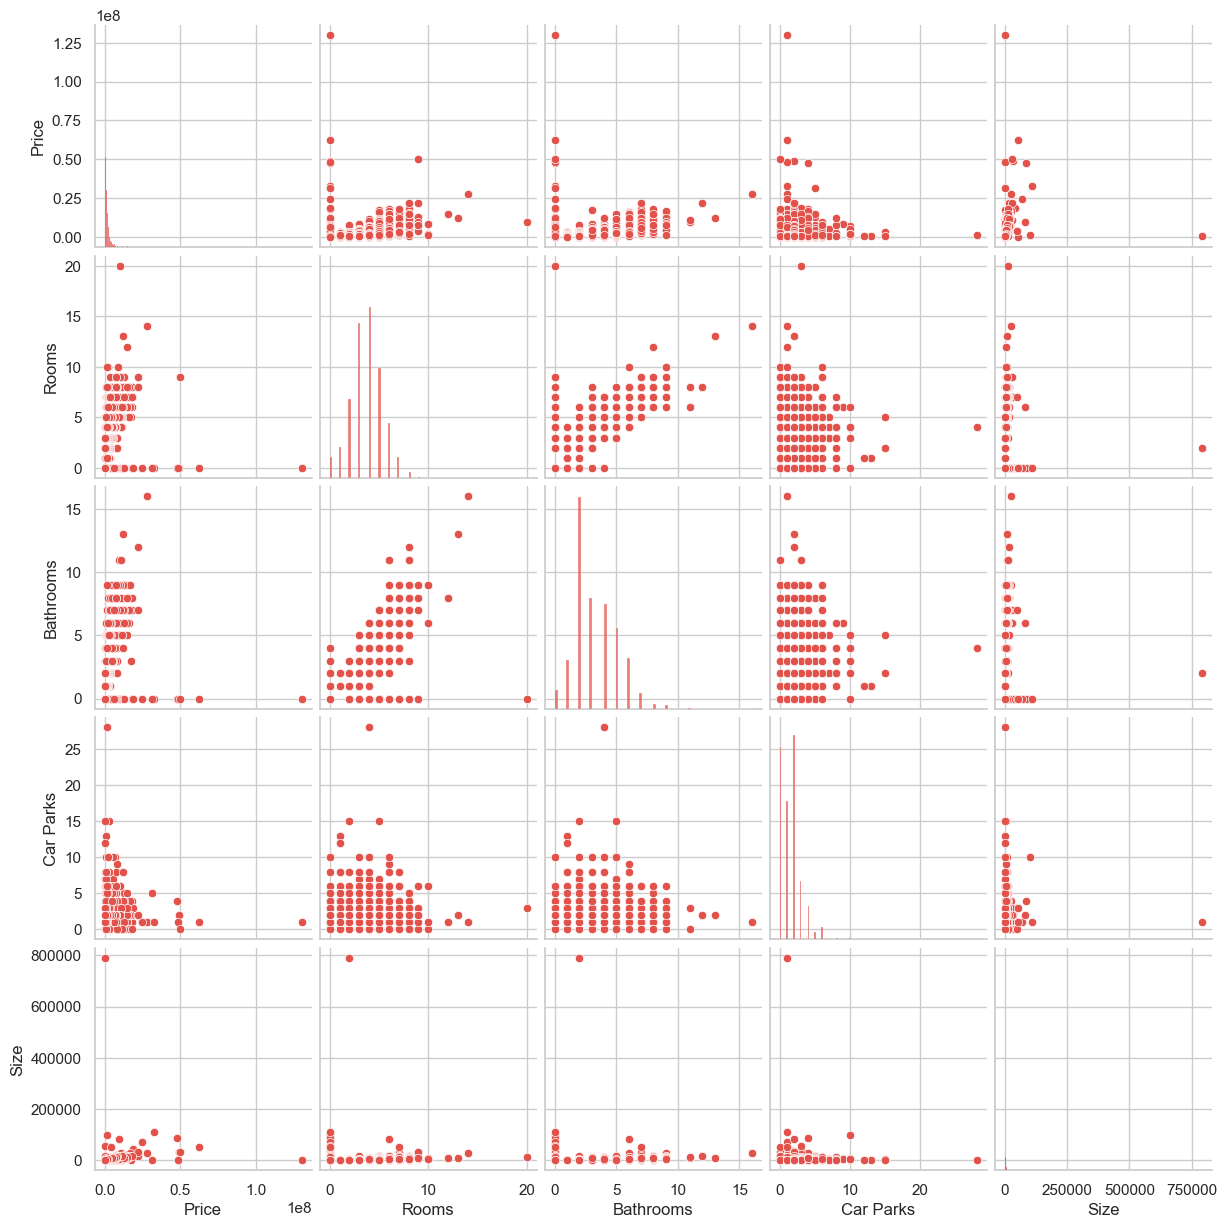

In [51]:
sns.pairplot(df)

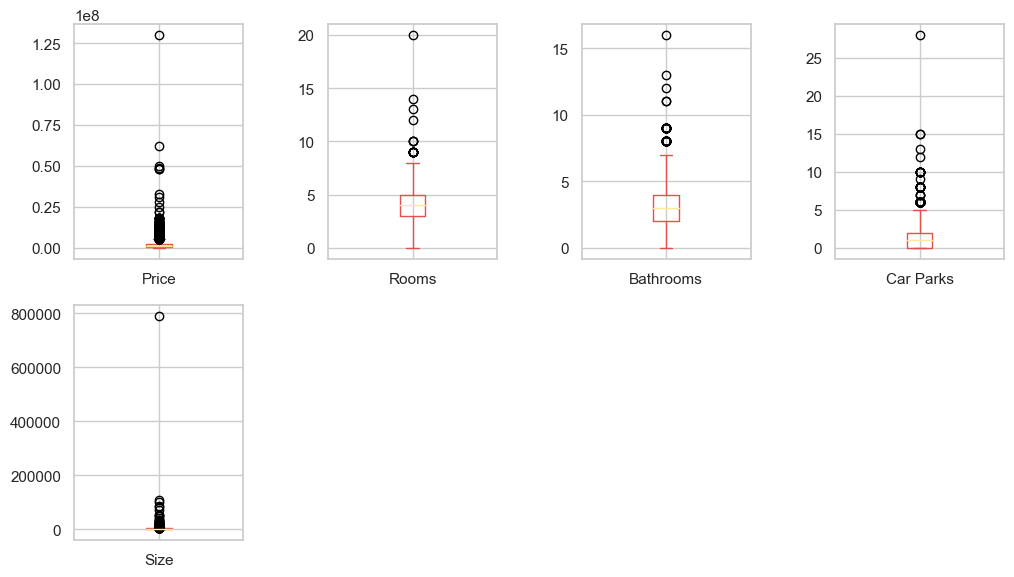

In [52]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))

plt.subplots_adjust(wspace=0.5);


### - Price & Size

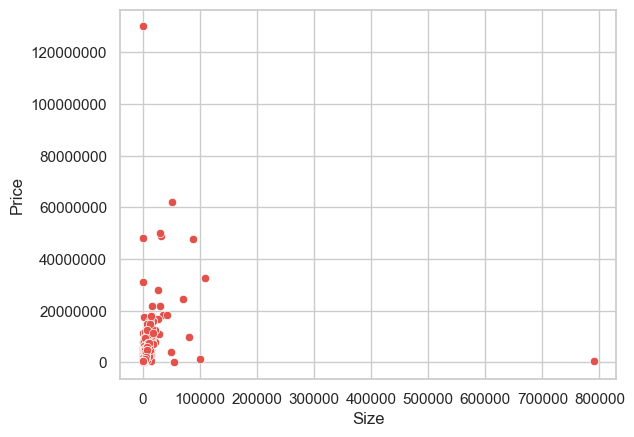

In [53]:
plt.ticklabel_format(style='plain')
sns.scatterplot(x="Size", y="Price", data=df)

# Show the plot
plt.show()

# ada yang tidak masuk akal yaitu size yang besar tetapi harga murah

In [54]:
# melihat data apa saja yang diduga outliers

pd.concat([df.loc[df['Size'] > 150000], df.loc[df['Price'] > 80000000]])

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
2437,Wangsa Maju,450000,2,2,1,Condominium,Built-up,790000,Partly Furnished
4828,Pantai,130000000,0,0,1,Residential Land,Land area,0,Unfurnished


<b> apakah jumlah data yang di duga outlier banyak?
    Ternyata hanya ada 2 data dan itu bisa di drop

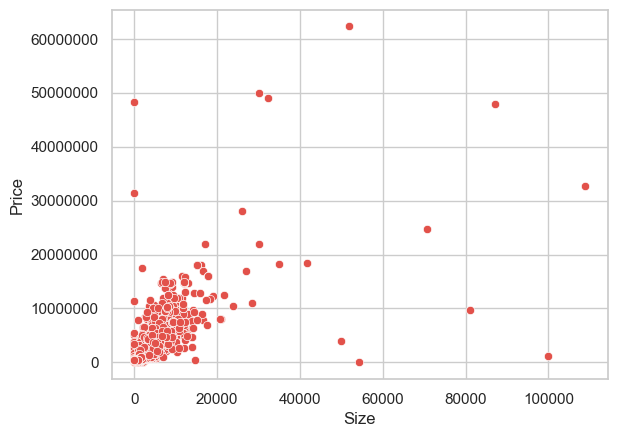

In [55]:
df = df.drop(df[(df['Size'] > 150000) | (df['Price'] > 80000000)].index)

plt.ticklabel_format(style='plain')
sns.scatterplot(x="Size", y="Price", data=df)

# Show the plot
plt.show()

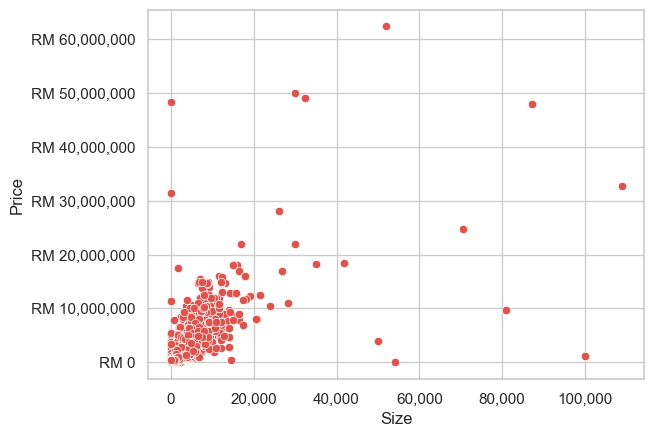

In [56]:
import matplotlib.ticker as ticker

# Create the plot
sns.scatterplot(x="Size", y="Price", data=df)

# Format the y axis as currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('RM {x:,.0f}'))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

In [57]:
# scanning ulang yang diduga outlier

pd.concat([df.loc[df['Size'] > 40000], df.loc[df['Price'] > 30000000]])

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
511,Ampang,1280000,0,0,10,Residential Land,Land area,100000,Unfurnished
1424,Keramat,18500000,0,0,3,Residential Land,Land area,41707,Unfurnished
2983,KL City,47916000,0,0,4,Residential Land,Land area,87120,Unfurnished
2987,Pandan Perdana,24680000,0,0,1,Residential Land,Land area,70543,Unfurnished
2988,Sentul,32670000,0,0,1,Residential Land,Land area,108900,Unfurnished
3792,Keramat,130000,0,0,3,Flat,Built-up,54200,Unfurnished
3971,Damansara,9700000,6,6,2,Bungalow,Land area,81000,Partly Furnished
4693,Sri Petaling,3900000,7,7,0,Semi-detached House,Land area,50000,Fully Furnished
4829,Brickfields,62262000,0,0,1,Residential Land,Land area,51885,Unfurnished
2983,KL City,47916000,0,0,4,Residential Land,Land area,87120,Unfurnished


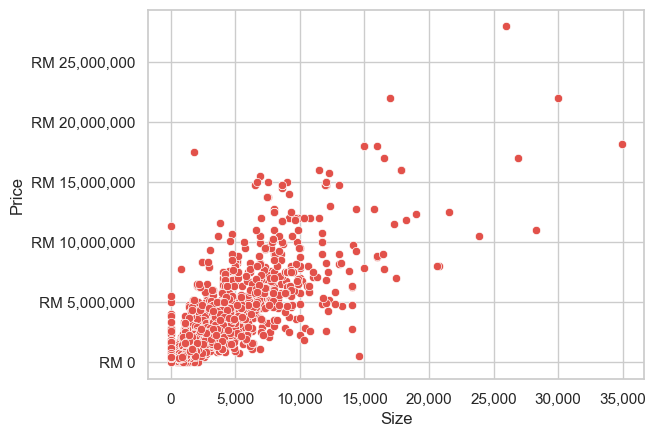

In [58]:
df = df.drop(df[(df['Size'] > 40000) | (df['Price'] > 30000000)].index)

# Create the plot
sns.scatterplot(x="Size", y="Price", data=df)

# Format the y axis as currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('RM {x:,.0f}'))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

<b>harga rendah dari 100 ribu ringgit akan di drop karena tidak masuk akal

In [59]:
df.loc[df['Price'] < 100000]

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
922,KLCC,1800,0,1,3,Serviced Residence (Intermediate),Built-up,493,Partly Furnished
923,KLCC,1800,0,1,1,Serviced Residence (Intermediate),Built-up,493,Partly Furnished
1196,KLCC,7500,2,2,0,Serviced Residence (Intermediate),Built-up,1078,Fully Furnished
1878,Bukit Bintang,3000,1,1,1,Condominium (Intermediate),Built-up,538,Fully Furnished
2549,KLCC,8000,5,5,3,Serviced Residence (Corner),Built-up,2096,Fully Furnished
2708,Taman Tun Dr Ismail,2500,3,2,0,Condominium (Corner),Built-up,1384,Fully Furnished
3642,Setapak,1150,3,2,2,Condominium,Built-up,947,Unfurnished
3958,Bukit Jalil,3300,5,4,2,Condominium (Intermediate),Built-up,1772,Partly Furnished
4004,Dutamas,3000,1,1,1,Serviced Residence,Built-up,748,Fully Furnished
4144,Mont Kiara,2800,3,2,0,Condominium,Built-up,1270,Fully Furnished


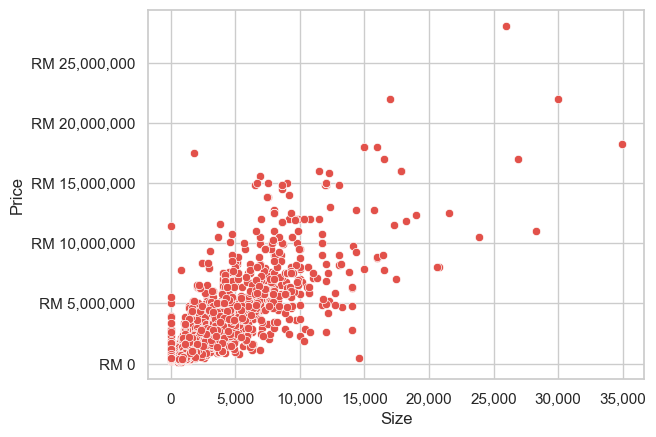

In [60]:
df = df[df['Price'] >= 100000]

# Create the plot
sns.scatterplot(x="Size", y="Price", data=df)

# Format the y axis as currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('RM {x:,.0f}'))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

<b> dari data di atas sepertinya tidak ada masalah dan masuk akal

In [61]:
df['Size'].value_counts(0)

0       118
1650     82
1760     65
1400     50
1200     44
       ... 
1143      1
755       1
864       1
3070      1
5403      1
Name: Size, Length: 1412, dtype: int64

<b> Drop data yang size property sama dengan 0

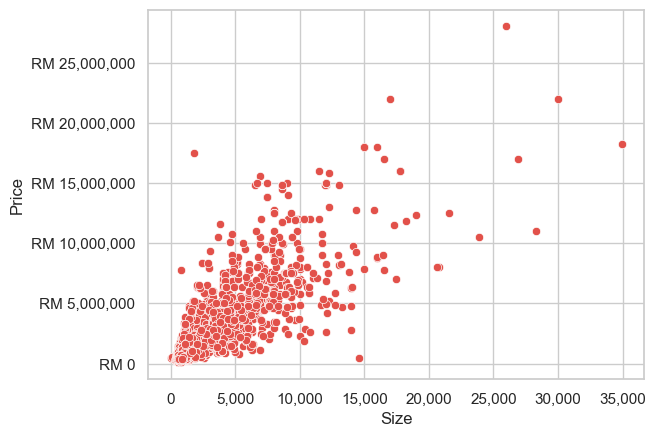

In [62]:
df = df.drop(df[df['Size'] == 0].index)

# Create the plot
sns.scatterplot(x="Size", y="Price", data=df)

# Format the y axis as currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('RM {x:,.0f}'))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

In [63]:
#memastikan data dengan melihat property dengan harga di atas 20 mil
df.loc[df['Price'] > 20000000]

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
466,KLCC,28000000,14,16,1,Bungalow,Land area,26000,Partly Furnished
1293,Damansara Heights,22000000,8,12,2,Bungalow,Land area,17000,Unfurnished
4483,Damansara Heights,22000000,9,7,2,Bungalow (Corner),Land area,30000,Partly Furnished


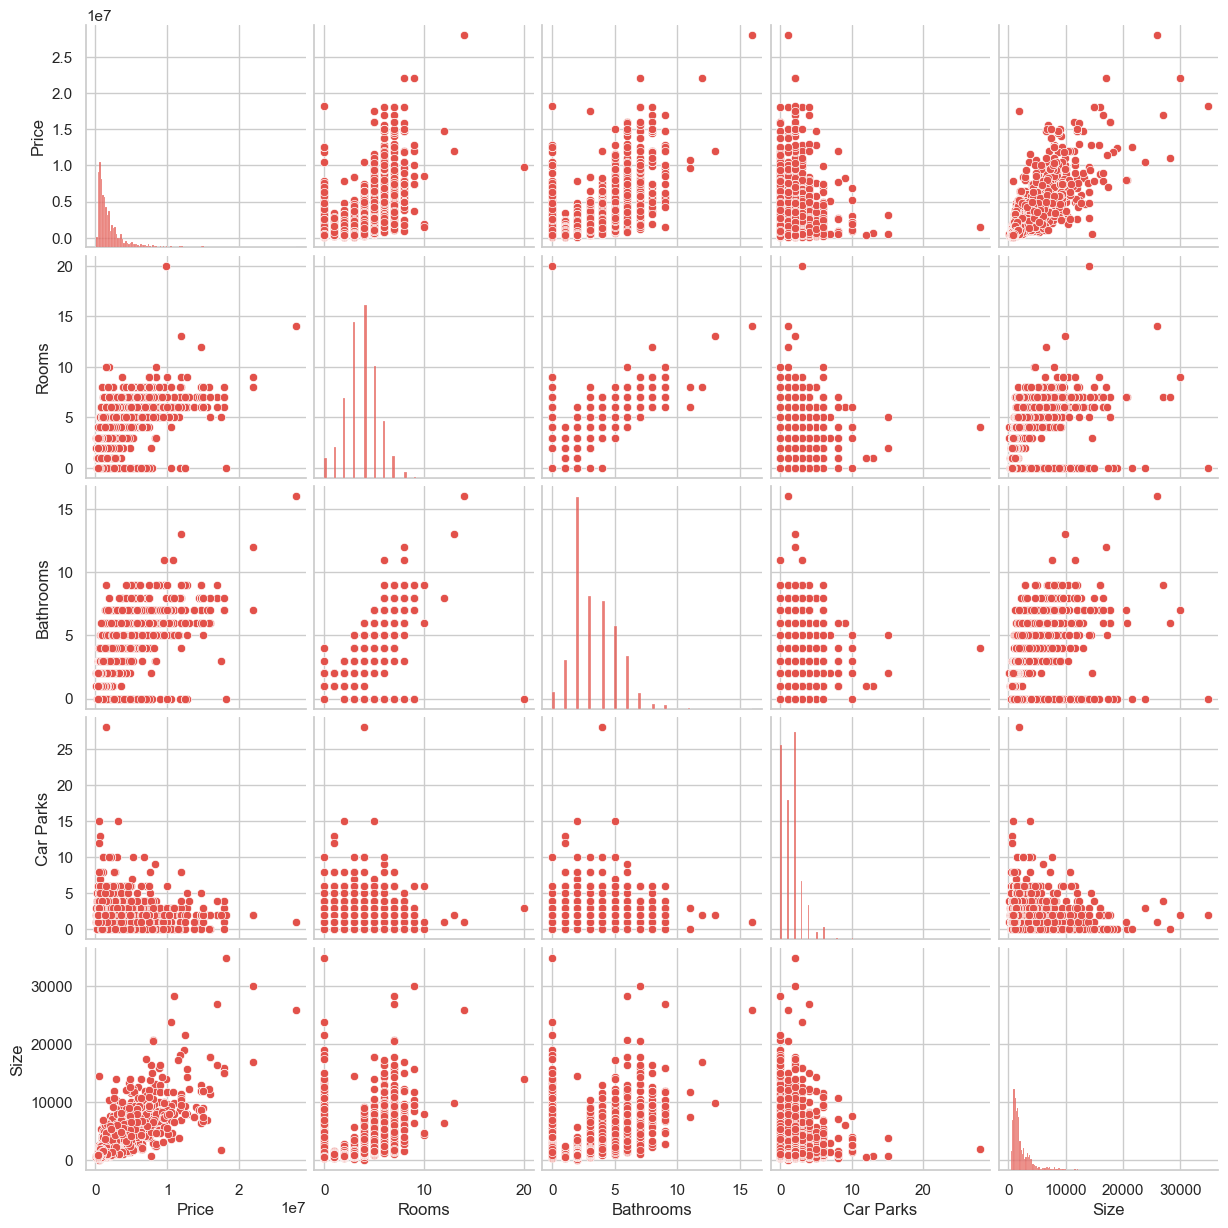

In [64]:
sns.pairplot(df)

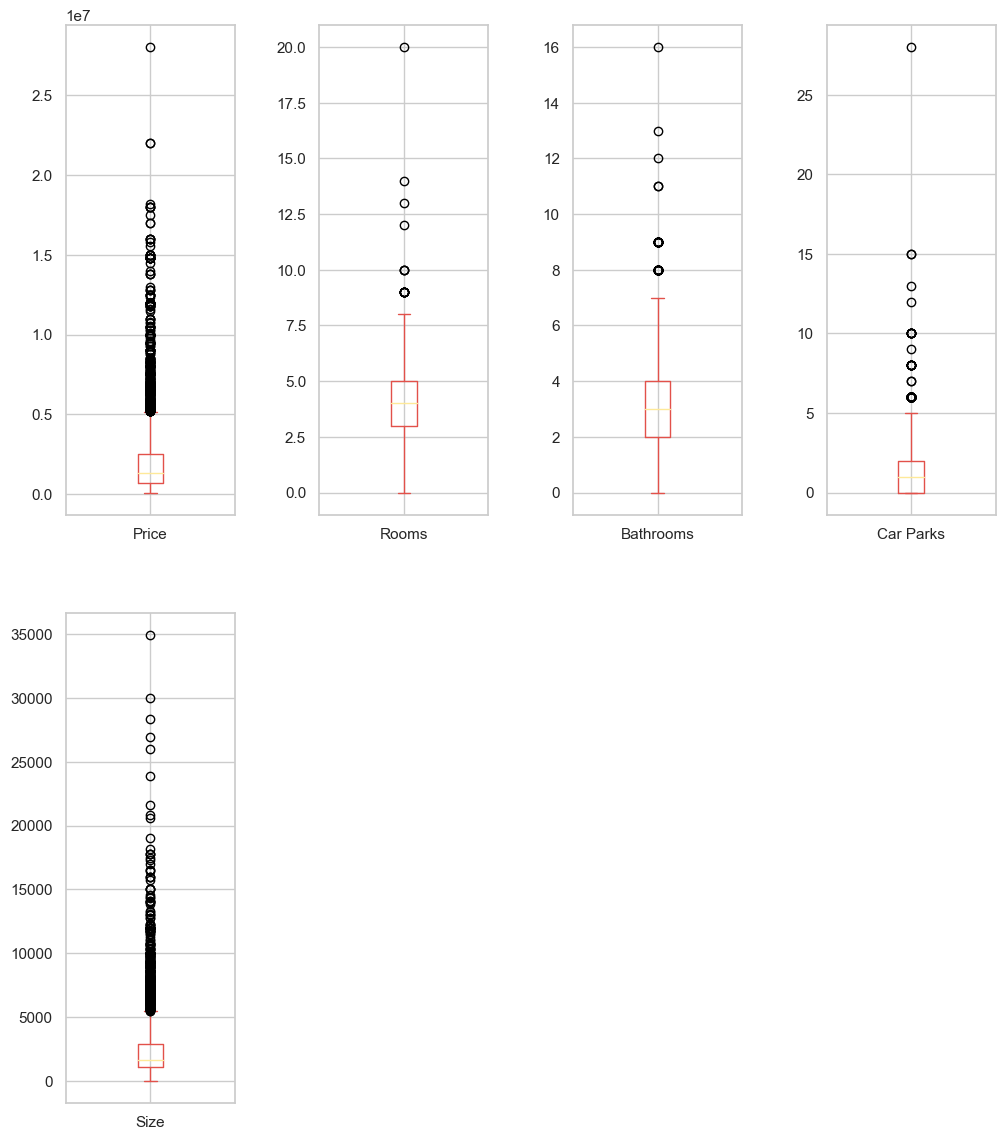

In [65]:
df.plot(subplots=True, layout=(2,4), kind='box', figsize=(12,14))

plt.subplots_adjust(wspace=0.5);

### - Rooms & Bathrooms

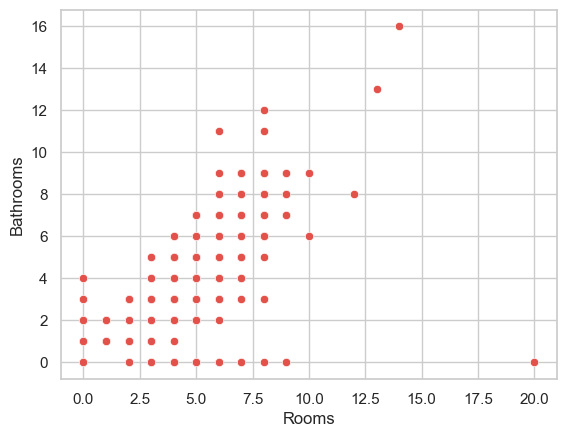

In [66]:
sns.scatterplot(x="Rooms", y="Bathrooms", data=df)

# Show the plot
plt.show()

# ada yang tidak masuk akal yaitu Rooms banyak namun tidak ada Bathrooms

In [67]:
df.loc[df['Rooms'] > 15]

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
2765,Bangsar,9800000,20,0,3,Bungalow (Intermediate),Land area,14102,Fully Furnished


In [68]:
# recall original data sebagai pembanding
dfo = pd.read_csv("D:\desktop download\JUPYTER_NB\intermediate new\dataset.csv")

In [69]:
dfo['Rooms'] = dfo['Rooms'].astype(str)

In [70]:
df.loc[df['Rooms'] > 15]

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Property Character,Size,Furnishing
2765,Bangsar,9800000,20,0,3,Bungalow (Intermediate),Land area,14102,Fully Furnished


<b> karena data original juga tidak bisa jadi referensi, bisa kita coba lihat rata rata jumlah bathroom dengan Land Size

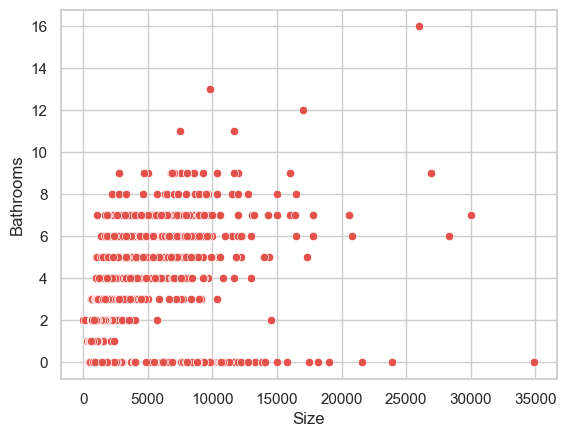

In [71]:
sns.scatterplot(x="Size", y="Bathrooms", data=df)

# Show the plot
plt.show()


In [72]:
len(df.loc[df['Bathrooms'] == 0])

123

<AxesSubplot: xlabel='Price', ylabel='Count'>

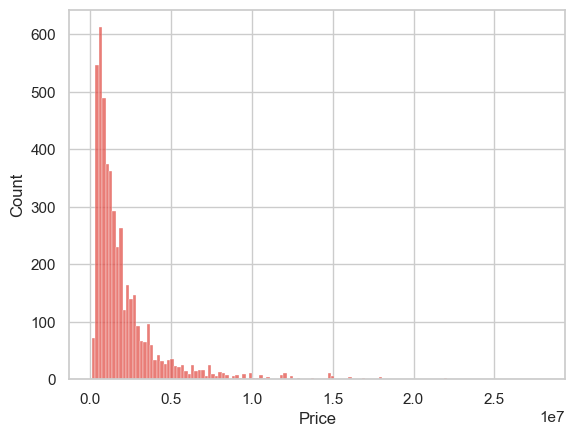

In [73]:
sns.histplot(df['Price'])

<b>pandangan terhadap data jadi lebih jelas
    
    
    
    
    
    .

## c. Distributions
- Apakah terdapat distribusi yang tidak masuk akal?

In [74]:
Numeric = df.columns
Numeric

Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Property Character', 'Size', 'Furnishing'],
      dtype='object')

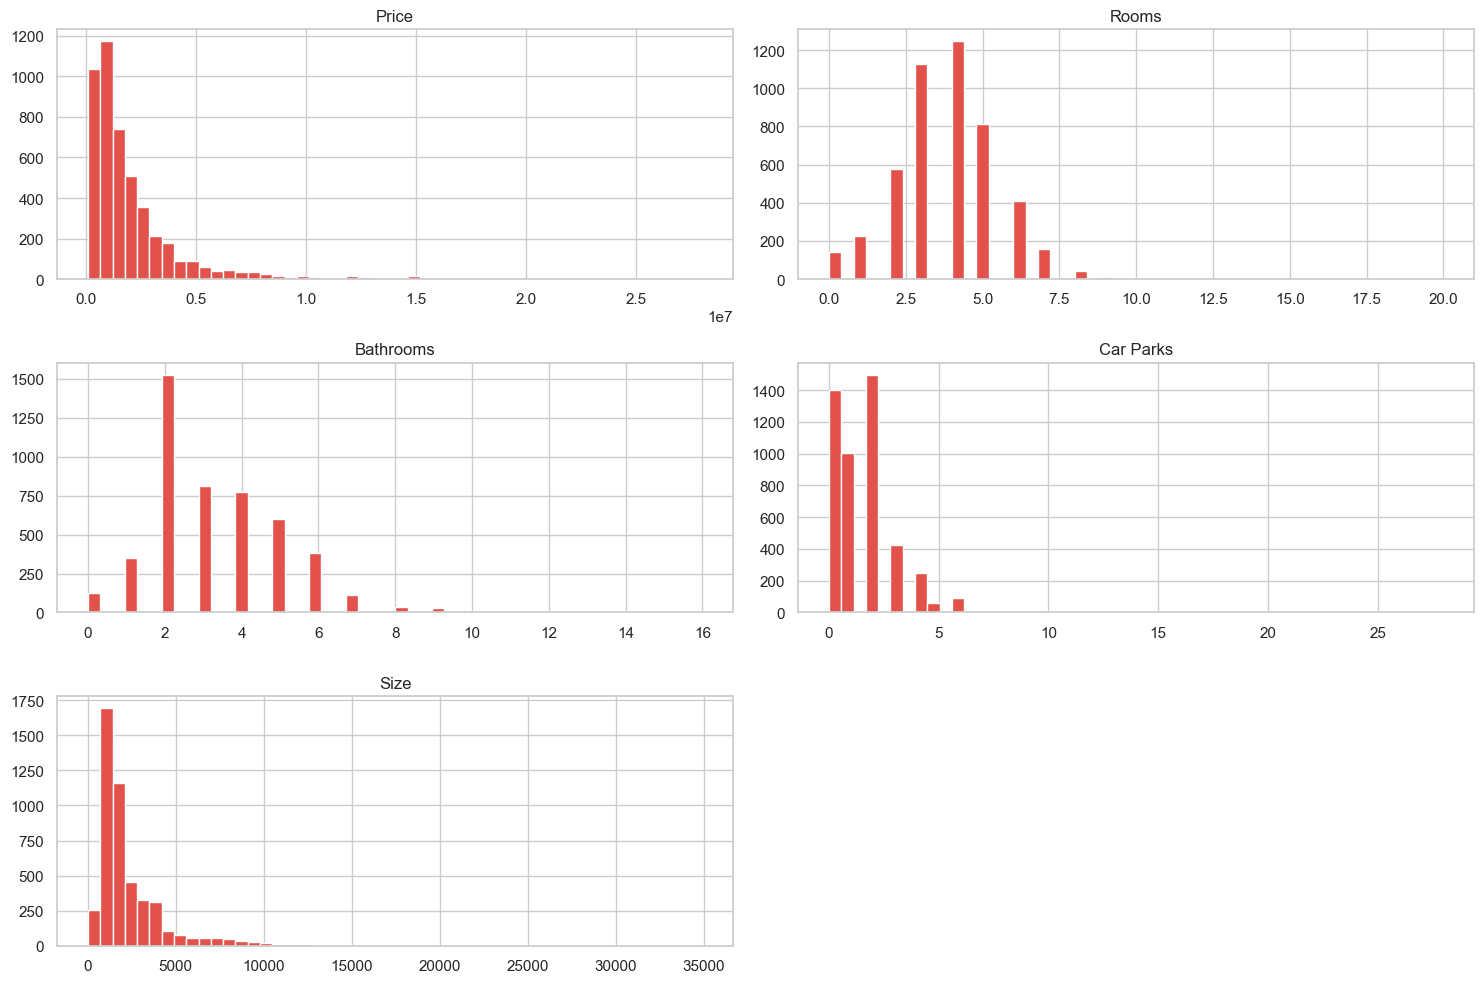

In [75]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(3,2), column=Numeric)
plt.tight_layout()
plt.show()

<b> data terlihat terdistribuusi dengan normal

<AxesSubplot: >

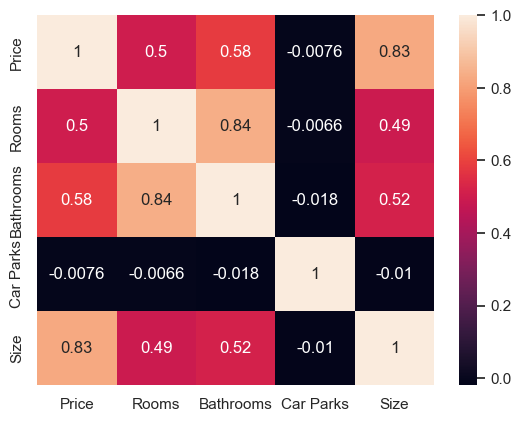

In [76]:
correlation = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

# 3. Data Insight

beberapa metode yang digunakan untuk menganalisis studi kasus ini adalah:

a. Descryptive Statistics

b. Correlation Analysis

c. Linier Regression analysis


## a. Descryptive Statistics

### - Price

In [77]:
# Mean
mean = df['Price'].mean()
print("Mean:", mean)

# Standard Error
stderror = df['Price'].sem()
print("Standard Error:", stderror)

# Median
median = df['Price'].median()
print("Median:", median)

# Mode
mode = df['Price'].mode()
print("Mode:", mode)

# Standard Deviation
stddev = df['Price'].std()
print("Standard Deviation:", stddev)

# Sample Variance
sample_variance = df['Price'].var()
print("Sample Variance:", sample_variance)

# Kurtosis
kurtosis = df['Price'].kurtosis()
print("Kurtosis:", kurtosis)

# Skewness
skewness = df['Price'].skew()
print("Skewness:", skewness)

# Range
range = df['Price'].max() - df['Price'].min()
print("Range:", range)

# Minimum
minimum = df['Price'].min()
print("Minimum:", minimum)

# Maximum
maximum = df['Price'].max()
print("Maximum:", maximum)

# Sum
sum = df['Price'].sum()
print("Sum:", sum)

# Count
count = df['Price'].count()
print("Count:", count)

# Largest(1)
largest = df['Price'].nlargest(1)
print("Largest(1):", largest)

# Smallest(1)
smallest = df['Price'].nsmallest(1)
print("Smallest(1):", smallest)

# Confidence Level(95%)
conf_level = df['Price'].quantile(.95)
print("Confidence Level(95%):", conf_level)

Mean: 2076811.1784511784
Standard Error: 33713.01391529176
Median: 1300000.0
Mode: 0    1200000
Name: Price, dtype: int32
Standard Deviation: 2323998.245280022
Sample Variance: 5400967844064.62
Kurtosis: 16.067259247294164
Skewness: 3.342055388095151
Range: 27895000
Minimum: 105000
Maximum: 28000000
Sum: 9869006720
Count: 4752
Largest(1): 466    28000000
Name: Price, dtype: int32
Smallest(1): 4341    105000
Name: Price, dtype: int32
Confidence Level(95%): 6488999.999999996


#### 1. Mean

In [78]:
print(mean)

2076811.1784511784


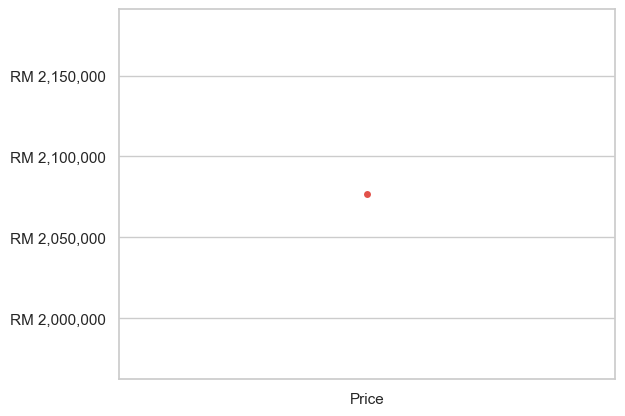

In [79]:
sns.stripplot(x=["Price"], y=[mean])

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('RM {x:,.0f}'))

# Show the plot
plt.show()